<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/class_activities/PLA%26Pocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [184]:
df = pd.read_csv("synthetic_dataset.csv")
df.head()

,x1,x2,y
0,-4.641770,5.558556,1
1,7.139793,6.571105,1
2,4.127969,-9.024912,-1
3,0.081377,3.861381,1
4,-1.253937,8.009625,1


<Axes: xlabel='x1', ylabel='x2'>

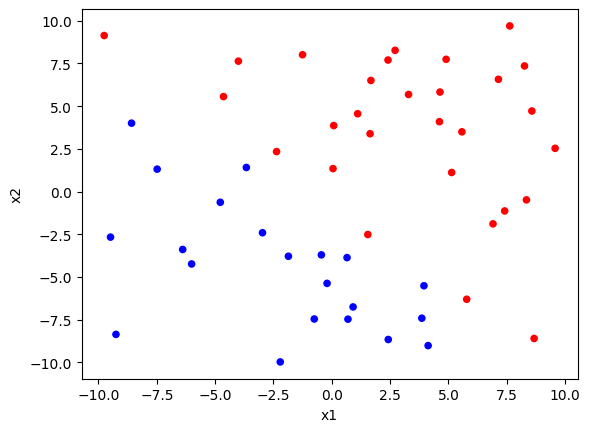

In [185]:
c = df['y'].map({-1:'b', 1: 'r'})
df.plot.scatter(x='x1', y='x2', c=c)

In [186]:
df.insert(0, "x0", 1)
df.head()

,x0,x1,x2,y
0,1,-4.641770,5.558556,1
1,1,7.139793,6.571105,1
2,1,4.127969,-9.024912,-1
3,1,0.081377,3.861381,1
4,1,-1.253937,8.009625,1


In [202]:
def find_misclassified(x, y, weight):
    misclassified_indices = []
    for i in range(len(x)):
        dot_product = np.dot(x[i], weight)
        if np.sign(dot_product) != y[i]:
            misclassified_indices.append(i)

    return misclassified_indices

In [209]:
def PLA(df, max_iterations=100):
    w = np.zeros(3)
    df_x = df.iloc[:, [0, 1, 2]].values
    df_y = df.iloc[:, 3].values

    for _ in range(max_iterations):
        misclassified_indices = find_misclassified(df_x, df_y, w)
        if len(misclassified_indices) == 0:
            break

        index = np.random.choice(misclassified_indices)
        x_mis, y_mis = df_x[index], df_y[index]
        w += x_mis * y_mis

        print(f"Current weights: {w}, Misclassified: {len(misclassified_indices)}")
    return w

In [204]:
def evaluate(x, y, weight):
    return len(find_misclassified(x, y, weight))

In [205]:
def Pocket_algo(df, max_iterations=100):
    w = np.zeros(3)
    best_w = np.copy(w)
    df_x = df.iloc[:, [0, 1, 2]].values
    df_y = df.iloc[:, 3].values

    min_misclassified = evaluate(df_x, df_y, w)

    for _ in range(max_iterations):
        misclassified_indices = find_misclassified(df_x, df_y, w)
        if len(misclassified_indices) == 0:
            break

        index = np.random.choice(misclassified_indices)
        x_mis, y_mis = df_x[index], df_y[index]
        w += x_mis * y_mis

        num_misclassified = evaluate(df_x, df_y, w)
        if num_misclassified < min_misclassified:
            best_w = np.copy(w)
            min_misclassified = num_misclassified

        print(f"Current weights: {w}, Best weights: {best_w}, Misclassified: {num_misclassified}")

    return best_w

In [210]:
# Run PLA algorithm
w_PLA = PLA(df)
w_PLA

Current weights: [-1.         -0.69145683  7.47599484], Misclassified: 50
Current weights: [0.         7.64978611 6.98560094], Misclassified: 9
Current weights: [1.         5.28175317 9.32288446], Misclassified: 3
Current weights: [ 2.         11.0632373   3.01189638], Misclassified: 3
Current weights: [1.         7.11414613 8.53137806], Misclassified: 8
Current weights: [ 2.         12.89563026  2.22038998], Misclassified: 3
Current weights: [1.         9.03751772 9.64021502], Misclassified: 9
Current weights: [ 2.         14.81900185  3.32922695], Misclassified: 3
Current weights: [ 1.         10.86991067  8.84870863], Misclassified: 8
Current weights: [ 2.          1.11429429 17.98327402], Misclassified: 4
Current weights: [ 3.          8.02229194 16.08729137], Misclassified: 8
Current weights: [ 4.          9.5658481  13.56766555], Misclassified: 3
Current weights: [ 5.         18.23582798  4.96039387], Misclassified: 3
Current weights: [ 6.         13.59405772 10.51894959], Miscla

array([16.        , 14.62294449, 15.27700107])

In [211]:
# Run Pocket Algorithm
w_pocket = Pocket_algo(df)
w_pocket

Current weights: [-1.          0.75231374  7.46616562], Best weights: [-1.          0.75231374  7.46616562], Misclassified: 8
Current weights: [0.         2.29586991 4.94653981], Best weights: [0.         2.29586991 4.94653981], Misclassified: 4
Current weights: [-1.         10.87899168  0.94436833], Best weights: [0.         2.29586991 4.94653981], Misclassified: 11
Current weights: [-2.          9.96783702  7.70447387], Best weights: [0.         2.29586991 4.94653981], Misclassified: 4
Current weights: [-1.          0.21222064 16.83903927], Best weights: [0.         2.29586991 4.94653981], Misclassified: 9
Current weights: [-2.          8.79534242 12.83686779], Best weights: [-2.          8.79534242 12.83686779], Misclassified: 3
Current weights: [-1.         14.57682655  6.52587972], Best weights: [-2.          8.79534242 12.83686779], Misclassified: 7
Current weights: [-2.         10.71871401 13.94570475], Best weights: [-2.          8.79534242 12.83686779], Misclassified: 3
Curren

array([23.        , 19.04707016, 18.50070884])

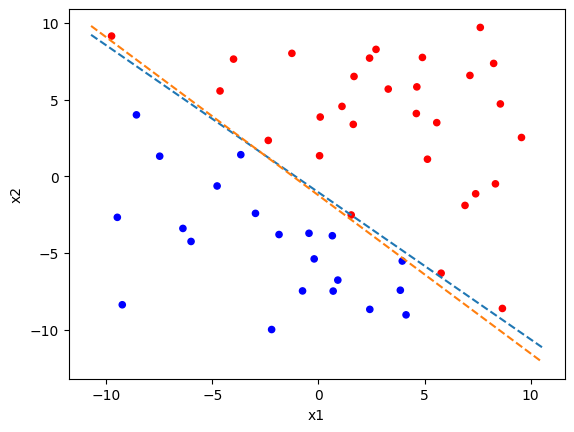

In [212]:
c = df['y'].map({-1:'b', 1: 'r'})
df.plot.scatter(x='x1', y='x2', c=c)
axes = plt.gca()
x_val = np.array(axes.get_xlim())
# x_val = np.linspace(-10, 10, 100)
y_val_PLA = -w_PLA[0]/w_PLA[2] - w_PLA[1]/w_PLA[2] * x_val
y_val_pocket = -w_pocket[0]/w_pocket[2] - w_pocket[1]/w_pocket[2] * x_val
plt.plot(x_val, y_val_PLA, '--')
plt.plot(x_val, y_val_pocket, '--')